# Processing tabular data with Pandas

Statistical analysis is usually based on **data
tabular**, in which each line represents an observation and
each column a variable. To process this type of data and
easily apply standard data analysis methods,
dedicated objects have been designed: `DataFrames`. `R` users
are familiar with this data structure, which is native to this language
statistically oriented. In `Python`, a general-purpose language, this object
does not exist natively. Fortunately, a very complete library and
very practical, thought of as an overlay to `NumPy`, introduced in
`Python` the `DataFrame` object and allows manipulation and analysis of
data in a simple and intuitive way: `Pandas`.

> **Note**
> Pandas being the central element of the data science ecosystem in
> Python, it offers data processing possibilities
> almost infinite. In addition to that, there are usually multiple
> ways to perform the same operation in Pandas. As a result, this
> chapter is particularly long and dense with news
> features. The goal is not to retain all the methods
> presented throughout this chapter, but rather to have a vision
> general of what it is possible to do in order to be able to mobilize
> the right tools in projects. In particular, the end-of-project exercises
> chapter and the end-of-training mini-projects will be an opportunity
> to apply this new knowledge to problems
> concrete.

We start by importing the `Pandas` library. The common usage is
to give it the alias `pd` in order to simplify future calls to
objects and functions from the package. We also import `NumPy` because we are going to
compare the fundamental objects of the two packages.

In [1]:
import pandas as pd
import numpy as np

## Data Structures

To fully understand how `Pandas` works, you need to take an interest
to its fundamental objects. We will therefore first study the `Series`, of which
concatenation is used to construct a `DataFrame`.

### The `Series`

A Series is a one-dimensional data container that can
accommodate any data type (integers, *strings*, objects
Python…). A Series is nevertheless of a given type: a Series does not
containing only integers will be of type `int`, and a Series containing
objects of different nature will be of type `object`. Let's build
our first Series from a list to check this
behavior.

In [2]:
l = [1, "X", 3]
s = pd.Series(l)
print(s)

0    1
1    X
2    3
dtype: object


In particular, you can access the data of a Series by position, like
for a list or array.

In [3]:
print(s[1])

X


At first glance, we don't see much difference between a Series and a
*array* `NumPy` 1-dimensional. However, there is a difference in
size which is the presence of an index: the observations have a label
associated. When creating a Series without specifying anything, the index is
automatically set to integers from 0 to n-1 (with n the number of elements
of the Series). But it is possible to pass a specific index (eg:
dates, names of municipalities, etc.).

In [4]:
s = pd.Series(l, index=["a", "b", "c"])
print(s)

a    1
b    X
c    3
dtype: object


Which allows access to data by label:

In [5]:
s["b"]

'X'

This difference appears secondary at first glance, but will become
essential for the construction of the DataFrame. For the rest, the Series
behave very similarly to NumPy arrays: the calculations are
vectorized, we can directly add two Series, etc.
Moreover, we can very easily convert a Series into an array via
the `values` attribute. Which, of course, causes the index to be lost…

In [6]:
s = pd.Series(l, index=["a", "b", "c"])
s.values

array([1, 'X', 3], dtype=object)

### The `DataFrame`

Basically, a DataFrame consists of a collection of Series,
aligned by the indexes. This concatenation therefore constructs a table of
data, whose Series correspond to the columns, and whose index
identifies the lines. The following figure
([source](https://www.geeksforgeeks.org/creating-a-pandas-dataframe/))
allows you to understand this data structure well.

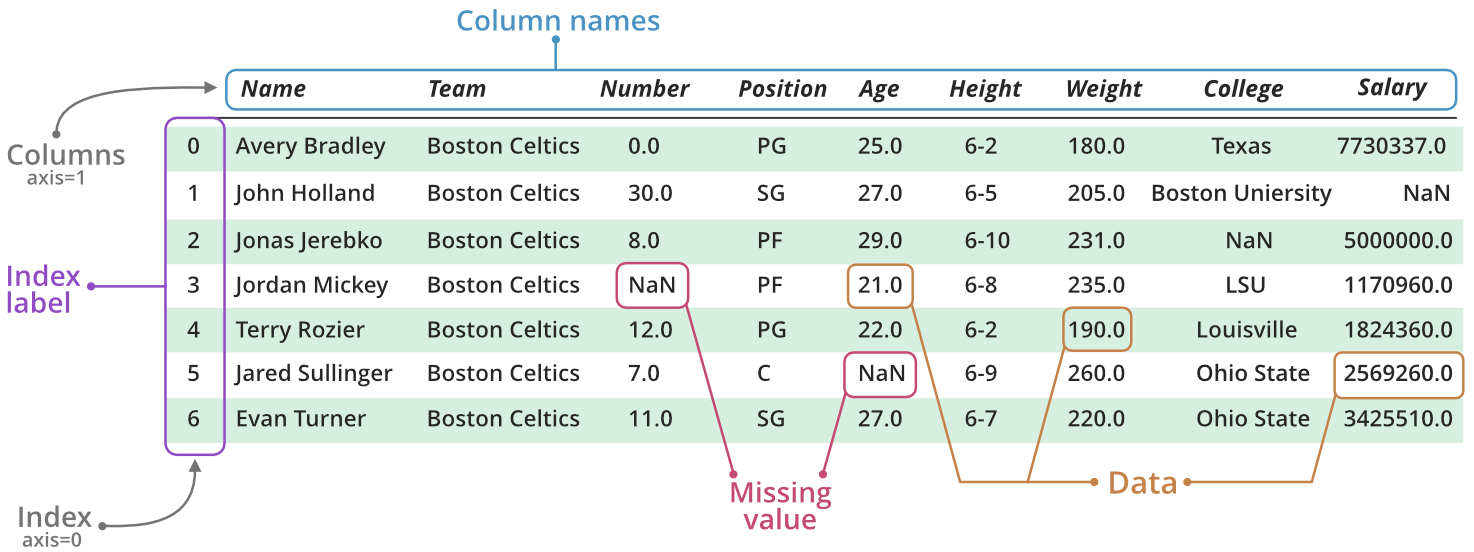

A DataFrame can be constructed in multiple ways. In practice, we
usually constructs a DataFrame directly from files
tabular data (eg CSV, excel), rarely by hand. We will illustrate
so only the most common manual construction method: to
from a data dictionary.

In [7]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
        "experiment": ["test", "train", "test", "train", "train", "validation"],
        "date": ["2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04", "2022-01-05", "2022-01-06"],
        "sample": "sample1"
    }
)

df

,var1,var2,experiment,date,sample
0,1.3,-9,test,2022-01-01,sample1
1,5.6,-6,train,2022-01-02,sample1
2,NaN,5,test,2022-01-03,sample1
3,NaN,1,train,2022-01-04,sample1
4,0.0,3,train,2022-01-05,sample1
5,NaN,3,validation,2022-01-06,sample1


A Pandas DataFrame has a set of useful attributes that we
will discover throughout this tutorial. For now,
Let's look at the most basic ones: the index and the column names.
default, the index is initialized as for Series to the list of
positions of the observations. An alternative index could have been specified
when constructing the DataFrame by specifying the `index` argument of
the `pd.DataFrame` function.

In [8]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [9]:
df.columns

Index(['var1', 'var2', 'experiment', 'date', 'sample'], dtype='object')

Often, rather than specifying an index by hand when
construction of the DataFrame, we will want to use a certain column
of the DataFrame as an index. For this we use the `set_index` method
associated with DataFrames.

In [10]:
df = df.set_index("date")
df

,var1,var2,experiment,sample
date,,,,
2022-01-01,1.3,-9,test,sample1
2022-01-02,5.6,-6,train,sample1
2022-01-03,NaN,5,test,sample1
2022-01-04,NaN,1,train,sample1
2022-01-05,0.0,3,train,sample1
2022-01-06,NaN,3,validation,sample1


The index attribute has naturally changed:

In [11]:
df.index

Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06'],
      dtype='object', name='date')

## Select data

When manipulating tabular data, it is common to
want to extract specific columns from a `DataFrame`. This
Extraction is easy with `Pandas` thanks to the use of hooks.

### Select columns

#### Select a single column

To extract a single column, we can use the following syntax:

In [12]:
selected_column = df["var1"]
selected_column

date
2022-01-01    1.3
2022-01-02    5.6
2022-01-03    NaN
2022-01-04    NaN
2022-01-05    0.0
2022-01-06    NaN
Name: var1, dtype: float64

The `selected_column` object here returns the column named `var1` of the
`DataFrame` `df`. But what type is this object? To answer
This question uses the `type()` function:

In [13]:
type(selected_column)

pandas.core.series.Series

As we can see, the result is a `Series`, which is an object
one-dimensional in `Pandas`.

Another useful attribute to know is `shape`. It allows you to know
the dimension of the object. For a `Series`, `shape` will return a tuple
whose first element indicates the number of lines.

In [14]:
selected_column.shape

(6,)

#### Select multiple columns

To extract multiple columns, simply pass a list of names
desired columns:

In [15]:
selected_columns = df[["var1", "var2", "experiment"]]
selected_columns

,var1,var2,experiment
date,,,
2022-01-01,1.3,-9,test
2022-01-02,5.6,-6,train
2022-01-03,NaN,5,test
2022-01-04,NaN,1,train
2022-01-05,0.0,3,train
2022-01-06,NaN,3,validation


This snippet shows the `var1`, `var2` and `experiment` columns of the
`DataFrame` `df`. Now let's check its type:

In [16]:
type(selected_columns)

pandas.core.frame.DataFrame

The result is a `DataFrame`, because it is a two-dimensional object.
We can also check its shape with the `shape` attribute. In this case, the
tuple returned by `shape` will contain two elements: the number of rows
and the number of columns.

In [17]:
selected_columns.shape

(6, 3)

### Select lines

#### Using `loc` and `iloc`

When we want to select specific rows in a DataFrame, we
can use two main methods: `loc` and `iloc`.

- `iloc` allows you to select rows and columns by their
position, that is, by numerical indices.

Example, selection of the first 3 lines:

In [18]:
df.iloc[0:3, :]

,var1,var2,experiment,sample
date,,,,
2022-01-01,1.3,-9,test,sample1
2022-01-02,5.6,-6,train,sample1
2022-01-03,NaN,5,test,sample1


- `loc` on the other hand, works with labels. If the indexes of the
DataFrame are numbers, they look like positions, but this
is not necessarily the case. It is crucial to note that,
Unlike `iloc`, with `loc` the end index is included in
the selection.

In [19]:
df.loc["2022-01-01":"2022-01-03", :]

,var1,var2,experiment,sample
date,,,,
2022-01-01,1.3,-9,test,sample1
2022-01-02,5.6,-6,train,sample1
2022-01-03,NaN,5,test,sample1


#### Filtering data based on conditions

In practice, rather than selecting lines based on
positions or labels, we often want to filter a DataFrame according to
certain conditions. In this case, filters are mainly used
booleans.

- **Inequalities**: We may want to keep only the lines which
meet a certain condition.

Example, filter rows where the value of column `var2` is
greater than 0:

In [20]:
df[df['var2'] >= 0]

,var1,var2,experiment,sample
date,,,,
2022-01-03,NaN,5,test,sample1
2022-01-04,NaN,1,train,sample1
2022-01-05,0.0,3,train,sample1
2022-01-06,NaN,3,validation,sample1


- **Membership with `isin`**: If we want to filter the data based
on a list of possible values, the `isin` method is very
useful.

Example, to keep only rows where the `experiment` column has
‘test’ or ‘validation’ values:

In [21]:
df[df['experiment'].isin(['train', 'validation'])]

,var1,var2,experiment,sample
date,,,,
2022-01-02,5.6,-6,train,sample1
2022-01-04,NaN,1,train,sample1
2022-01-05,0.0,3,train,sample1
2022-01-06,NaN,3,validation,sample1


These methods can be combined to create more favorable conditions.
complex. It is also possible to use logical operators (`&`
for “and”, `|` for “or”) to combine multiple conditions. Be careful,
It is important to take care to frame each condition with
parentheses when combining.

Example, select rows where `var2` is greater than 0 and
`experiment` is equal to `test` or `validation`:

In [22]:
df[(df['var2'] >= 0) & (df['experiment'].isin(['train', 'validation']))]

,var1,var2,experiment,sample
date,,,,
2022-01-04,NaN,1,train,sample1
2022-01-05,0.0,3,train,sample1
2022-01-06,NaN,3,validation,sample1


## Exploring tabular data

In public statistics, the starting point is generally not the
manual generation of data, but rather tabular files
pre-existing. These files, whether from surveys, databases
administrative or other sources, constitute the raw material
for any further analysis. Pandas offers powerful tools for
import these tabular files and explore them for manipulation
more advanced.

### Import and export data

#### Import a CSV file

As we saw in a previous TP, the CSV format is one of the
most common formats for storing tabular data. We
previously used the `csv` library to manipulate them as
text files, but it was not very practical. As a reminder, the
syntax to read a CSV file and display the first lines was
the following:

In [23]:
import csv

rows = []

with open("data/departement2021.csv") as file_in:
    csv_reader = csv.reader(file_in)
    for row in csv_reader:
        rows.append(row)

rows[:5]

[['DEP', 'REG', 'CHEFLIEU', 'TNCC', 'NCC', 'NCCENR', 'LIBELLE'],
 ['01', '84', '01053', '5', 'AIN', 'Ain', 'Ain'],
 ['02', '32', '02408', '5', 'AISNE', 'Aisne', 'Aisne'],
 ['03', '84', '03190', '5', 'ALLIER', 'Allier', 'Allier'],
 ['04',
  '93',
  '04070',
  '4',
  'ALPES DE HAUTE PROVENCE',
  'Alpes-de-Haute-Provence',
  'Alpes-de-Haute-Provence']]

With Pandas, you just need to use the `read_csv()` function to import
the file as a DataFrame, then the `head()` function.

In [26]:
df_departements = pd.read_csv('data/departement2021.csv')
df_departements.head()

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


It is also possible to import a CSV file directly from
of a URL. This is especially useful when the data is
regularly updated on a website and that we wish to access
to the latest version without having to manually download the
file each time. Let's take the example of a CSV file available on
the INSEE website: the first name file, from state data
civil. We note in passing another very practical feature: the
CSV file is compressed (`zip` format), but Pandas is able to
recognize and decompress it before importing it.

In [30]:
# Import CSV file from URL
url = "https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip"
df_prenoms_url = pd.read_csv(url, sep=";")
df_prenoms_url.head()

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430


When working with CSV files, there are many arguments
optional functions available in the `read_csv()` function that allow
to adjust the import process according to the specificities of the
file. These arguments can notably be used to define a
specific delimiter (as above for the first name file),
skip certain lines at the beginning of the file, or even define the
data types for each column, and many more. All these
parameters and their usage are detailed in the [documentation
official](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

#### Export to CSV

Once the data has been processed and modified within
Pandas, it is common to want to export the result as
CSV file to share, archive or use in other
tools. Pandas offers a simple method for this operation:
`to_csv()`. For example, suppose we want to export the data
from the DataFrame `df_departements` specific to the five departments
from overseas.

In [40]:
df_departements_dom = df_departements[df_departements["DEP"].isin(["971", "972", "973", "974", "975"])] #The second part of this equation will produce a series of boolean values
df_departements_dom.to_csv('departements2021_dom.csv', sep = ";")
df_departements_dom
#!cat output/departments2021_dom.csv #The teacher added this. Doesn't work. I don't know what it does. The exclamation point refers to a shell operation.

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
96,971,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
97,972,2,97209,3,MARTINIQUE,Martinique,Martinique
98,973,3,97302,3,GUYANE,Guyane,Guyane
99,974,4,97411,0,LA REUNION,La Réunion,La Réunion


One of the key arguments of the `to_csv()` method is `index`. By default,
`index=True`, which means that the DataFrame's index will also be
written in the CSV file. This can be verified by printing the
first lines of our CSV file: Pandas added a column
unnamed, which contains the index of the retained lines.

In [41]:
with open("departements2021_dom.csv") as file_in:
    for i in range(5):
        row = next(file_in).strip()
        print(row)

;DEP;REG;CHEFLIEU;TNCC;NCC;NCCENR;LIBELLE
96;971;1;97105;3;GUADELOUPE;Guadeloupe;Guadeloupe
97;972;2;97209;3;MARTINIQUE;Martinique;Martinique
98;973;3;97302;3;GUYANE;Guyane;Guyane
99;974;4;97411;0;LA REUNION;La RÃ©union;La RÃ©union


In some cases, particularly when the index does not provide information
useful or is simply automatically generated by Pandas, one could
want to exclude it from the exported file. To do this, you can define
`index=False`.

In [42]:
df_departements_dom.to_csv('departements2021_dom_noindex.csv', index=False)

#### Import a Parquet file

Parquet format is another format for data storage
tabular, increasingly frequently used. Without going into the
technical details, the Parquet format presents different
features that make it a preferred choice for storage and
processing of large volumes of data. Due to these advantages, this
format is increasingly used for data provision
at INSEE. It is therefore essential to know how to import and request
Parquet files with Pandas.

Importing a Parquet file into a Pandas DataFrame is just as easy
easily than for a CSV file. The function is called
`read_parquet()`.

In [46]:
!pip install pandas fastparquet
df_departements = pd.read_parquet('data/departement2021.parquet')
df_departements.head()


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rita_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/671.0 kB ? eta -:--:--
    --------------------------------------- 10.2/671.0 kB ? eta -:--:--
   - ------------------------------------- 30.7/671.0 kB 445.2 kB/s eta 0:00:02
   - ------------------------------------- 30.7/671.0 kB 445.2 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/671.0 kB 245.8 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/671.0 kB 299.4 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/671.0 kB 299.4 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/671.0 kB 299.4 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/671.0 kB 262.6 kB/s eta 0:00:03
   --------- ---------------------------- 174.1/671.0 kB 436.9 kB/s eta 0:00:02
   --------- ---------------------------- 174.1/671.0 kB 436.9 kB/s eta 0:00:02
   ----------- -------------------------- 204.8/671.0 kB 429.5 kB/s eta 0:00:02
   ----------- -------------------------- 204.8/671.0 kB 

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


#### Export to Parquet format

Here again, everything happens as in the world of CSV: we use the
`to_parquet()` method to export a DataFrame to a file
Parquet. Similarly, one can choose whether or not to export the index, using the
`index` parameter (which is `True` by default).

In [49]:
#!pip install pandas pyarrow
df_departements_dom = df_departements[df_departements["DEP"].isin(["971", "972", "973", "974", "975"])]
df_departements_dom.to_parquet('departements2021_dom.parquet', index=False)

One of the great strengths of the Parquet format, compared to other formats
text like CSV, is its ability to store metadata, i.e.
data to better understand the data contained in the
file. In particular, a Parquet file includes in its metadata
the data schema (variable names, variable types, etc.),
which makes it a very suitable format for data dissemination.
Let's check this behavior by taking the DataFrame we have
previously defined.

In [50]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
        "experiment": ["test", "train", "test", "train", "train", "validation"],
        "date": ["2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04", "2022-01-05", "2022-01-06"],
        "sample": "sample1"
    }
)

df = df.assign(
    experiment=pd.Categorical(df["experiment"]),
    date=pd.to_datetime(df["date"])
)

This time we use two specific types of data, for the
categorical data (`category`) and for temporal data
(`datetime`). We will see later in the tutorial how to use these
types. For now, let's just note that Pandas stores these types
in the data schema.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   var1        3 non-null      float64       
 1   var2        6 non-null      int32         
 2   experiment  6 non-null      category      
 3   date        6 non-null      datetime64[ns]
 4   sample      6 non-null      object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 438.0+ bytes


Now let's check that the export and re-import of this data in
Parquet preserves the pattern.

In [53]:
df.to_parquet("df_test_schema.parquet", index=False)
df_test_schema_parquet = pd.read_parquet('df_test_schema.parquet')

df_test_schema_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   var1        3 non-null      float64       
 1   var2        6 non-null      int32         
 2   experiment  6 non-null      category      
 3   date        6 non-null      datetime64[ns]
 4   sample      6 non-null      object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 438.0+ bytes


Conversely, a CSV file, which by definition only contains text, does not
does not allow us to preserve this data. The variables we have
specified type are imported as strings (type `object` in
Pandas).

In [55]:
df.to_csv("df_test_schema.csv", index=False)
df_test_schema_csv = pd.read_csv('df_test_schema.csv')

df_test_schema_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   var1        3 non-null      float64
 1   var2        6 non-null      int64  
 2   experiment  6 non-null      object 
 3   date        6 non-null      object 
 4   sample      6 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 372.0+ bytes


### View a sample of the data

When working with large datasets, it is often
useful to quickly view a sample of the data to get a
idea of ​​their structure, their format or even to detect
potential problems. Pandas offers several methods for this.

The `head()` method is used to display the first rows of the DataFrame.
By default it returns the first 5 lines, but you can specify
another number as an argument if necessary.

In [56]:
df_departements.head()

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


In [57]:
df_departements.head(10)

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes
5,06,93,06088,4,ALPES MARITIMES,Alpes-Maritimes,Alpes-Maritimes
6,07,84,07186,5,ARDECHE,Ardèche,Ardèche
7,08,44,08105,4,ARDENNES,Ardennes,Ardennes
8,09,76,09122,5,ARIEGE,Ariège,Ariège
9,10,44,10387,5,AUBE,Aube,Aube


Conversely, the `tail()` method gives a preview of the last few lines of the
DataFrame.

In [58]:
df_departements.tail()

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
96,971,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
97,972,2,97209,3,MARTINIQUE,Martinique,Martinique
98,973,3,97302,3,GUYANE,Guyane,Guyane
99,974,4,97411,0,LA REUNION,La Réunion,La Réunion
100,976,6,97608,0,MAYOTTE,Mayotte,Mayotte


Sometimes the display of the first or last lines may not be
representative of the entire dataset, when the data is
sorted for example. In order to minimize the risk of getting a preview
biased data, one can use the `sample()` method, which
selects a random sample of rows. By default, it
returns a single row, but a specific number of rows can be requested.
lines using the `n` argument.

In [61]:
df_departements.sample(n=5)

,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
14,15,84,15014,2,CANTAL,Cantal,Cantal
99,974,4,97411,0,LA REUNION,La Réunion,La Réunion
31,31,76,31555,3,HAUTE GARONNE,Haute-Garonne,Haute-Garonne
44,44,52,44109,3,LOIRE ATLANTIQUE,Loire-Atlantique,Loire-Atlantique
39,39,27,39300,2,JURA,Jura,Jura


### Get an overview of the data

One of the first steps when exploring new data
is to understand the general structure of the dataset. The method
Pandas' `info()` provides a quick overview of the data,
especially in terms of data types, presence of values
missing and used memory.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   var1        3 non-null      float64       
 1   var2        6 non-null      int32         
 2   experiment  6 non-null      category      
 3   date        6 non-null      datetime64[ns]
 4   sample      6 non-null      object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 438.0+ bytes


Several key pieces of information can be extracted from this
result :

- **index**: the DataFrame has a `RangeIndex`, which means that
The index consists of a simple numerical sequence. Here, the index goes
from 0 to 5, or 6 entries in total.

- **schema**: the list of columns is displayed with
very useful information about the data schema:

- **Non-Null Count**: the number of **non-missing** values
(non `nan`) in the column. If this number is less than the
total number of entries (in our case 6), this means that the
column contains missing values. Beware of ambiguity
possible on “null”: this means missing values,
not values ​​equal to 0. So, in our case, the number of
“non-null” values ​​for variable `var1` is 5.

- **Dtype**: The data type of the column, which allows
understand the nature of the information stored in each
column. For example, `float64` (real numbers), `int32`
(integers), `category` (categorical variable),
`datetime64[ns]` (information temporelle) and `object` (data
textual or mixed).

Using `info()` is a quick and efficient way to get a
overview of a DataFrame, to quickly identify the columns
containing missing values ​​and to understand the structure of the
data.

### Calculate descriptive statistics

In addition to the information returned by the `info()` method, we
may want to obtain simple descriptive statistics in order to
quickly visualize the distributions of variables. The method
`describe()` allows you to have a synthetic view of the distribution of
data in each column.

In [63]:
df.describe()

,var1,var2,date
count,3.00000,6.000000,6
mean,2.30000,-2.500000,2022-01-03 12:00:00
min,0.00000,-9.000000,2022-01-01 00:00:00
25%,0.65000,-5.500000,2022-01-02 06:00:00
50%,1.30000,-2.500000,2022-01-03 12:00:00
75%,3.45000,0.500000,2022-01-04 18:00:00
max,5.60000,4.000000,2022-01-06 00:00:00
std,2.93087,4.764452,NaN


Note that `describe()` only returns statistics for
numeric columns by default. If you want to include numeric columns
other types, it is necessary to specify it via the argument
`include`. For example, `df.describe(include='all')` will return
statistics for all columns, including metrics like the
unique number, most frequent value and frequency of the value
most common for non-numeric columns.

In [64]:
df.describe(include='all')

,var1,var2,experiment,date,sample
count,3.00000,6.000000,6,6,6
unique,NaN,NaN,3,NaN,1
top,NaN,NaN,train,NaN,sample1
freq,NaN,NaN,3,NaN,6
mean,2.30000,-2.500000,NaN,2022-01-03 12:00:00,NaN
min,0.00000,-9.000000,NaN,2022-01-01 00:00:00,NaN
25%,0.65000,-5.500000,NaN,2022-01-02 06:00:00,NaN
50%,1.30000,-2.500000,NaN,2022-01-03 12:00:00,NaN
75%,3.45000,0.500000,NaN,2022-01-04 18:00:00,NaN
max,5.60000,4.000000,NaN,2022-01-06 00:00:00,NaN


Note that, again, the `count` variable returns the number of values
**non-missing** in each variable.

## Main data manipulations

### Transform data

Data transformation operations are essential for
shape, clean and prepare data for analysis.
transformations can affect the entire DataFrame, columns
specific or even specific lines.

#### Transform a DataFrame

To transform a complete DataFrame (or a sub-DataFrame), it is
possible to use vectorized functions, which allow
to quickly apply an operation to all elements of the
DataFrame. This includes a number of methods available for
the `Series`, but also the mathematical functions of `NumPy`, etc.

For example, passing each numeric value of a DataFrame to the
power 2:

In [65]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
    }
)

df ** 2

,var1,var2
0,1.69,49
1,31.36,64
2,NaN,81
3,NaN,1
4,0.00,1
5,NaN,1


or pass them in absolute value:

In [66]:
np.abs(df)

,var1,var2
0,1.3,7
1,5.6,8
2,NaN,9
3,NaN,1
4,0.0,1
5,NaN,1


Some methods, available for `Series`, can also be
used to transform a complete DataFrame. For example, the well
useful method
[replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html),
which allows you to replace all occurrences of a given value with
another value. For example, suppose the value 0 in the column
`var1` actually indicates a measurement error. It would be better to
replace with missing value.

In [67]:
df.replace(0, np.nan)

,var1,var2
0,1.3,7
1,5.6,8
2,NaN,-9
3,NaN,1
4,NaN,-1
5,NaN,1


> **Assignment or *in place* methods?**
> In the previous example, the application of the method
> [replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
> does not directly modify the DataFrame. For the modification to be
> persistent, a first possibility is to assign the result to a
> subject:


In [68]:

df = df.replace(0, np.nan)


> A second possibility is, when the methods suggest it,
> to use the `inplace` argument. When `inplace=True`, the operation
> is performed “in place”, and the DataFrame is therefore modified
> directly.


In [69]:

df.replace(0, np.nan, inplace=True)


> In practice, it is better to limit `inplace` operations.
> They do not promote the reproducibility of analyses, in the
> as the re-execution of the same cell will give each time
> different results.

#### Transform columns

In some cases, we will not want to apply the transformations to
the entire data set, but to specific variables. The
transformations that are possible at the DataFrame scale (functions
vectorized, methods like
[replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html),
etc) remain naturally possible on the scale of a column.

In [70]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
    }
)

np.abs(df["var2"])

0    3
1    0
2    7
3    6
4    3
5    9
Name: var2, dtype: int32

In [71]:
df["var1"].replace(0, np.nan)

0    1.3
1    5.6
2    NaN
3    NaN
4    NaN
5    NaN
Name: var1, dtype: float64

But there are other transformations that are commonly applied
at the level of one or a few columns. For example, when the schema
was not properly recognized on import, it may happen that variables
numeric values ​​are defined as strings (type `object` in Pandas).

In [72]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan],
        "var2": ["1", "5", "18"],
    }
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    2 non-null      float64
 1   var2    3 non-null      object 
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In this case, we can use the `astype` method to convert the
column in the desired type.

In [73]:
df['var2'] = df['var2'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    2 non-null      float64
 1   var2    3 non-null      int32  
dtypes: float64(1), int32(1)
memory usage: 168.0 bytes


Another common operation is renaming one or more
columns. For this, we can use the method
[rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html),
to which we pass a dictionary which contains as many pairs
key-value than variables to rename, and in which each pair
key-value is of the form `'old_name': 'new_name'`.

In [74]:
df.rename(columns={'var2': 'age'})

,var1,age
0,1.3,1
1,5.6,5
2,NaN,18


Finally, one may wish to remove columns from the DataFrame that are not
not or no longer useful for analysis. For this, we use the method
[drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html),
to which we pass either a string (name of a column if we wish
delete only one) or a list of column names to
DELETE.

In [75]:
df.drop(columns=['var1'])

,var2
0,1
1,5
2,18


#### Transform lines

In statistics, we generally apply transformations that make
intervene one or more columns. However, in some cases, it
It is necessary to apply transformations at the line level.
For this, we can use the method
[apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
of Pandas, applied to the axis of the lines (`axis=1`). Let us illustrate its
operation with a simple case. To do this, we first generate
data.

In [76]:
df = pd.DataFrame(
    data = {
        "var1": [1, 5, 9, 13],
        "var2": [3, 7, 11, 15],
        "date": ["2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04"],
    }
)

df.head()

,var1,var2,date
0,1,3,2022-01-01
1,5,7,2022-01-02
2,9,11,2022-01-03
3,13,15,2022-01-04


We now apply the `apply()` function to the DataFrame in order to
calculate a new variable which is the sum of the two existing ones.

In [77]:
df['sum_row'] = df.apply(lambda row: row['var1'] + row['var2'], axis=1)

df.head()

,var1,var2,date,sum_row
0,1,3,2022-01-01,4
1,5,7,2022-01-02,12
2,9,11,2022-01-03,20
3,13,15,2022-01-04,28


> **Lambda functions**
> A `lambda` function is a small anonymous function. It can
> take any number of arguments, but can only have one
> single expression. In the example above, the `lambda` function takes
> a line as an argument and returns the sum of the columns `var1` and
> `var2` for this line.
> `lambda` functions allow you to easily define functions
> “on the fly”, without having to give them a name. In our example, this
> would have been perfectly equivalent to the following code:


In [78]:

def sum_row(row):
     return row['var1'] + row['var2']
df['sum_row'] = df.apply(sum_row, axis=1)


Although `apply()` offers great flexibility, it is not the
most efficient method, especially for large data sets.
Vectorized operations are always preferable because they deal with
data in bulk rather than line by line. In our case, it
It would of course have been preferable to create our variable using
operations on columns.

In [ ]:
df['sum_row_vect'] = df['var1'] + df['var2']

df.head()

However, we can find ourselves in certain (rare) cases where a
operation cannot be easily vectorized or where the logic is
complex. For example, suppose we want to combine the values
of multiple columns based on certain conditions.

In [ ]:
def combine_columns(row):
    if row['var1'] > 6:
        return str(row['var2'])
    else:
        return str(row['var2']) + "_" + row['date']

df['combined_column'] = df.apply(combine_columns, axis=1)

df

### Sort values

Sorting data is particularly useful for exploration and
data visualization. With Pandas, we use the method
[sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
to sort the values ​​of a DataFrame by one or more columns.

In [ ]:
df = pd.DataFrame(
    data = {
        "var1": [1, 5, 9, 13],
        "var2": [3, 7, 11, 15],
        "date": ["2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04"],
    }
)

df

To sort the values ​​by a single column, simply pass the
column name as parameter.

In [ ]:
df.sort_values(by='var1')

By default, sorting is done in ascending order. To sort the
values ​​in descending order, just set
`ascending=False`.

In [ ]:
df.sort_values(by='var1', ascending=False)

If we want to sort the DataFrame on multiple columns, we can
provide a list of column names. One can also choose to
sort ascending for some columns and descending for
others.

### Aggregate data

Data aggregation is a process in which data goes
be broken down into groups according to certain criteria, then aggregated according to
an aggregation function applied independently to each group.
This operation is common during exploratory analysis or during the
data preprocessing for visualization or modeling
statistical.

In [ ]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
        "experiment": ["test", "train", "test", "train", "train", "validation"],
        "date": ["2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04", "2022-01-05", "2022-01-06"],
        "sample": "sample1"
    }
)

df.head()

#### The `groupBy` operation

Pandas `groupBy` method allows you to divide the DataFrame into
subsets according to the values ​​of one or more columns, then
to apply an aggregation function to each subset. It
returns an object of type `DataFrameGroupBy` that does not have a large
interest in itself, but constitutes the essential intermediate step for
to then be able to apply one or more aggregation function(s) to the
different groups.

In [ ]:
df.groupby('experiment')

#### Aggregate functions

Once the data is grouped, functions can be applied
aggregation to obtain a statistical summary. Pandas integrates a
a number of these functions, the full list of which is detailed
in the
[documentation](https://pandas.pydata.org/docs/user_guide/groupby.html#built-in-aggregation-methods).
Here are some examples of how to use these methods.

For example, counting the number of occurrences in each group.

In [ ]:
df.groupby('experiment').size()

Calculate the sum of a variable by group.

In [ ]:
df.groupby('experiment')['var1'].sum()

Or count the number of unique values ​​of a variable per group.
The possibilities are numerous.

In [ ]:
# For the number of unique values ​​of 'var2' in each group
df.groupby('experiment')['var2'].nunique()

When you want to apply multiple aggregation functions at once
or custom functions, the `agg` method is used. This
method accepts a list of functions or a dictionary that associates
the names of the columns to the functions to be applied. This allows you to apply
more finely the aggregation functions.

In [ ]:
df.groupby('experiment').agg({'var1': 'mean', 'var2': 'count'})

> **Method chaining**
> The previous examples illustrate an important concept in Pandas: the
> method chaining. This term refers to the ability to chain methods together.
> transformations applied to a DataFrame by applying to it the
> method chain. For each method applied, a DataFrame
> intermediate is created (but not assigned to a variable), which becomes
> the input of the following method.
> Method chaining allows you to combine multiple operations into one
> single code expression. This can improve efficiency by avoiding
> intermediate assignments and making the code more fluid and
> easier to read. This also promotes a programming style
> functional where data passes through a chain of
> transformations in a fluid manner.

#### Effects on the index

It is interesting to note the effects of the aggregation process on
the index of the DataFrame. The last example above illustrates this well: the
groups, i.e. the modalities of the variable used to perform
aggregation, become the values ​​of the index.

We may want to reuse this information in analyses
later, and therefore want it as a column. It is enough for this
to reset the index with the `reset_index()` method.

In [ ]:
df_agg = df.groupby('experiment').agg({'var1': 'mean', 'var2': 'count'})
df_agg.reset_index()

### Dealing with missing values

Missing values ​​are a common reality in data processing.
actual data and may occur for various reasons, such as
non-responses to a questionnaire, data entry errors, losses
of data during transmission or simply because the information
is not applicable. Pandas offers several tools to manage
missing values.

#### Representation of missing values

In Pandas, missing values ​​are usually represented by
`np.nan`, which is a special marker provided by the library
`NumPy`. If it is preferable to use this object to denote the
missing values, note that the `None` object of `Python` is also
understood as a missing value by `Pandas`.

Let's check this property. To identify where the values ​​are located
missing, we use the `isna()` function which returns a DataFrame
boolean indicating `True` where values ​​are `NaN`.

In [ ]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
        "experiment": ["test", "train", "test", None, "train", "validation"],
        "sample": "sample1"
    }
)

df.isna()

#### Calculations on columns containing missing values

In statistical calculations, missing values ​​are usually
ignored. For example, the `.mean()` method calculates the mean of the
non-missing values.

In [ ]:
df['var1'].mean()

On the other hand, calculations involving several columns
do not always ignore missing values ​​and can often give
results in `NaN`.

In [ ]:
df['var3'] = df['var1'] + df['var2']

df

#### Removing missing values

The `dropna()` method allows you to delete lines (`axis=0`) or
columns (`axis=1`) containing missing values. By default, any
line containing at least one missing value is deleted.

In [ ]:
df.dropna()

By changing the `axis` parameter, one can request that any
column containing at least one missing value is deleted.

In [ ]:
df.dropna(axis=1)

Finally, the `how` parameter defines the deletion modality. By default,
a row or column is deleted when at least one value is
missing (`how=any`), but it is possible to just remove the
row/column only when all values ​​are missing
(`how=all`).

#### Replacing missing values

To handle missing values ​​in a DataFrame, one approach
common is imputation, which consists of replacing the values
missing values ​​by other values. The `fillna()` method allows
to perform this operation in different ways. A first
possibility is replacement by a constant value.

In [ ]:
df['var1'].fillna(value=0)

> **Change of representation of missing values**
> It can sometimes be tempting to change the manifestation of a value.
> missing for visibility reasons, for example by replacing it
> by a string of characters:


In [ ]:
df['var1'].fillna(value="MISSING")


> In practice, this way of doing things is not recommended. It is in
> better effect to keep the standard convention of `Pandas`
> (the use of `np.nan`), first for questions of
> standardization of practices that facilitate reading and
> code maintenance, but also because the standard convention
> is optimized for performance and calculations from data
> containing missing values.

Another common imputation method is to use a value
statistic, such as the mean or median of the variable.

In [ ]:
df['var1'].fillna(value=df['var1'].mean())

> **Imputation bias**
> Replace missing values ​​with a constant value, such as
> zero, the mean or median, can be problematic. If the
> data is not missing at random (*Missing Not At Random* -
> *MNAR*), this can introduce bias into the analysis. The variables
> *MNAR* are variables whose probability of being missing is
> related to their own value or to other variables in the data.
> In such cases, a more sophisticated imputation may be
> necessary to minimize distortions. We will see an example of this
> as an end-of-tutorial exercise.

### Process data of specific types

#### Text data

Text data often requires cleaning and
preparation before analysis. Pandas provides via the methods library
`str` a set of vectorized operations that make the preparation
textual data that is both simple and very effective. Here again, the
possibilities are multiple and detailed in the
[documentation](https://pandas.pydata.org/docs/user_guide/text.html).
Here we present the most frequently used methods in
data analysis.

In [ ]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
        "experiment": ["test", "train", "test", "test", "train", "validation"],
        "sample": ["  sample1", "sample1", "sample2", "   sample2   ", "sample2  ", "sample1"]
    }
)

df

A common first operation is to extract certain characters
of a string. For this, we use the function (with a slightly different syntax)
particular) `str[n:]` For example, if we want to extract the last
character of the variable `sample` in order to retain only the digit of
the sample.

In [ ]:
df["sample_n"] = df["sample"].str[-1:]

df

The principle was good, but the presence of superfluous spaces in our
text data (which were not visible when viewing the
DataFrame!) made the operation more difficult than expected. This is
the opportunity to introduce the `strip` method family (`.str.strip()`,
`.str.lstrip()` and `.str.rstrip()`) which respectively remove the
superfluous spaces on both sides or on one side only.

In [ ]:
df["sample"] = df["sample"].str.strip()
df["sample_n"] = df["sample"].str[-1:]

df

One may also want to filter a DataFrame based on the
presence or absence of a certain string (or substring) of characters. We
use the `.str.contains()` method for this.

In [ ]:
df[df['experiment'].str.contains('test')]

Finally, one may want to replace a string (or substring) of
characters by another, which is allowed by the `str.replace()` method.

In [ ]:
df['experiment'] = df['experiment'].str.replace('validation', 'val')

df

#### Categorical data

Categorical data are variables that contain a number
restricted modalities. Like `R` with the notion of `factor`,
Pandas has a special data type, `category`, which is useful for
represent categorical data more efficiently and more
informative. Categorical data is in fact optimized for
certain types of data and can speed up operations like
grouping and sorting. They are also useful for visualization,
because they ensure that categories are displayed in a
coherent and logical order.

To convert a variable to `category` format, we use the method
`astype()`.

In [ ]:
df = pd.DataFrame(
    data = {
        "var1": [1.3, 5.6, np.nan, np.nan, 0, np.nan],
        "var2": np.random.randint(-10, 10, 6),
        "experiment": ["test", "train", "test", None, "train", "validation"],
    }
)
print(df.dtypes)

In [ ]:
df['experiment'] = df['experiment'].astype('category')

print(df.dtypes)

This conversion gives us access to some very practical methods,
specific to the processing of categorical variables. It can for example
example it may be useful to rename categories for clarity
or standardization.

In [ ]:
df['experiment'] = df['experiment'].cat.rename_categories({'test': 'Test', 'train': 'Train', 'validation': 'Validation'})
df

Sometimes the order of the categories is significant, and one may want to
edit. Especially in the context of visualization, because the
Terms will be displayed in the specified order by default.

In [ ]:
df_cat = df['experiment'].cat.reorder_categories(['Test', 'Train', 'Validation'], ordered=True)
df.groupby("experiment").mean().plot(kind='bar')

#### Time data

Temporal data is often present in the data
tabular in order to temporally identify observations
collected. Pandas offers features to manipulate these types
of data, in particular thanks to the `datetime64` type which allows a
precise manipulation of dates and times.

In [ ]:
df = pd.DataFrame(
    data = {
        "var1": [1, 5, 9, 13],
        "var2": [3, 7, 11, 15],
        "date": ["2022-01-01", "2022-01-02", "2023-01-01", "2023-01-02"],
        "sample": ["sample1", "sample1", "sample2", "sample2"]
    }
)

df.dtypes

To manipulate time data, it is necessary to convert
strings to `datetime` objects. Pandas does this via the
`to_datetime()` function.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df.dtypes

Once converted, dates can be formatted, compared and
used in calculations. In particular, Pandas now understands
the “order” of the dates present in the data, and therefore allows the
filtering over given periods.

In [ ]:
df[(df['date'] >= "2022-01-01") & (df['date'] < "2022-01-03")]

We may also want to perform less precise filtering, making
intervene in the year or month. Pandas makes it easy to extract
specific components of the date, such as year, month, day,
time, etc.

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df[df['year'] == 2023]

Finally, calculations involving dates become possible.
can add or subtract time periods to dates, and
compare between them. The functions used are from `Pandas`,
but are very similar in their operation to those of the module
[time](https://docs.python.org/fr/3/library/time.html) from Python.

For example, we can add time intervals, or calculate
deviations from a reference date.

In [ ]:
df['date_plus_one'] = df['date'] + pd.Timedelta(days=1)
df['date_diff'] = df['date'] - pd.to_datetime('2022-01-01')

df

### Joining tables

When analyzing data, it is common to want to
combine different data sources. This combination can be done
vertically (one DataFrame on top of the other), for example when
we want to combine two vintages of the same survey in order to
analyze jointly. The combination can also be done
horizontally (side by side) according to one or more join keys,
often with the aim of enriching a data source from a
other source covering the same statistical units.

#### Concatenate tables

Vertical concatenation of tables is done using the function
Pandas `concat()`.

In [ ]:
df1 = pd.DataFrame(
    data = {
        "var1": [1, 5],
        "var2": [3, 7],
        "date": ["2022-01-01", "2022-01-02"],
        "sample": ["sample1", "sample1"]
    }
)

df2 = pd.DataFrame(
    data = {
        "var1": [9, 13],
        "date": ["2023-01-01", "2023-01-02"],
        "var2": [11, 15],
        "sample": ["sample2", "sample2"]
    }
)

df_concat = pd.concat([df1, df2])

df_concat

Note that the order of the variables in the two DataFrames is not
important. Pandas does not “stupidly” juxtapose the two DataFrames, it
does a pattern matching to match the
variables by name. If two variables have the same name but not the same
type - for example in case a numeric variable would have been
interpreted as strings - Pandas will solve the problem by
taking the common denominator, that is to say generally converting into
strings (type `object`).

On the other hand, the previous concatenation reveals a problem of
repetition at the index level. This is logical: we did not specify
index for our two initial DataFrames, which therefore have the same index of
position (\[0, 1\]). In this case (where the index is not important), we
can pass parameter `ignore_index=True` to rebuild from scratch
the final index.

In [ ]:
df_concat = pd.concat([df1, df2], ignore_index=True)

df_concat

> **Iterative construction of a DataFrame**
> We could have the idea of ​​using `pd.concat()` to construct a
> DataFrame iteratively, adding at each iteration a
> loops a new line to the existing DataFrame. This is however not
> not a good idea: as we have seen, a DataFrame is
> represented in memory as a juxtaposition of Series. Thus,
> adding a column to a DataFrame is inexpensive, but adding a
> line involves modifying each constituent element of the DataFrame.
> To build a DataFrame, it is therefore rather advisable to store
> lines in a list of lists (one per column) or a
> dictionary, then call `pd.DataFrame()` to construct the
> DataFrame, as we did at the beginning of this tutorial.

#### Merge tables

Merging tables is an operation that allows you to associate rows
of two different DataFrames based on one or more keys
common, similar to joins in SQL databases.
Different types of join are possible depending on the data that we
wishes to keep, the main ones of which are represented on the
next graph.

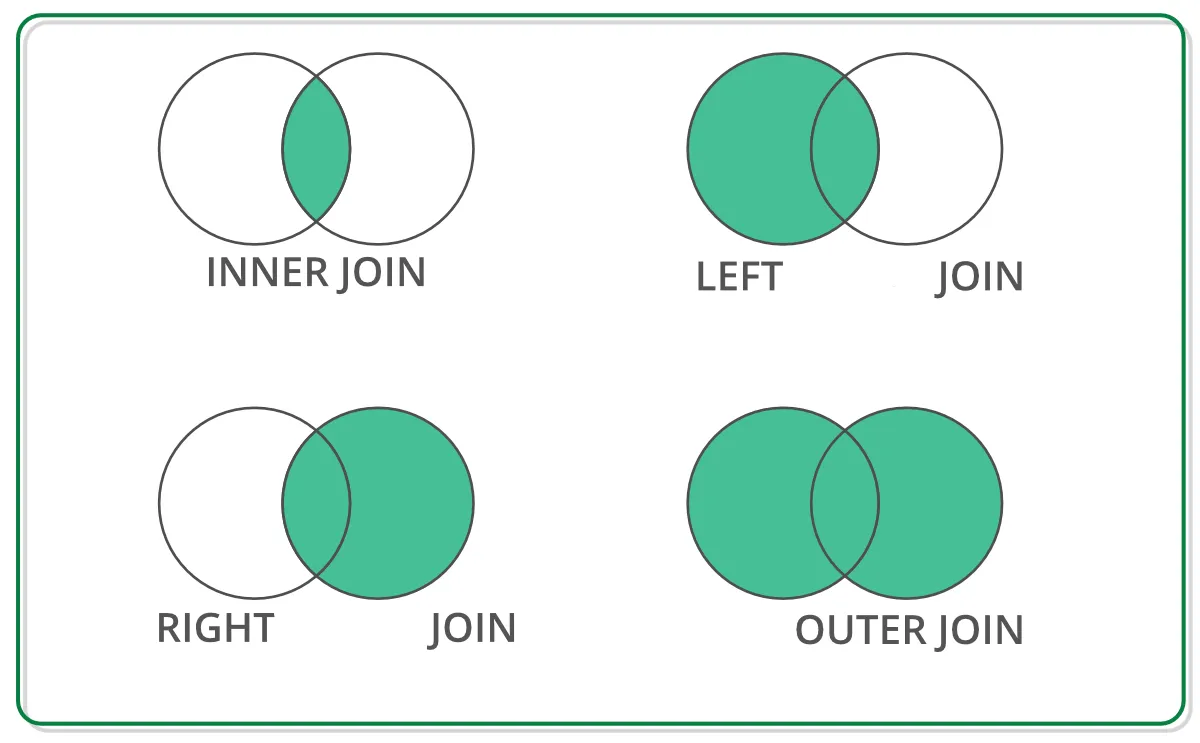

Source :
[lien](https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d)

In Pandas, joins are done with the function
[merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).
To perform a join, we must specify (at least) two
information:

- the join type: by default, Pandas performs a join of
type `inner`. The `how` parameter allows you to specify other types
of joining;

- the join key. By default, Pandas tries to join the two
DataFrames from their indexes. In practice, we often specify
a variable present in the DataFrames as a join key
(parameter `on` if the variable has the same name in both
DataFrame, or `left_on` and `right_on` otherwise).

Let's analyze the difference between different types of join through
examples.

In [ ]:
df_a = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3', 'K4'],
    'A': ['A0', 'A1', 'A2', 'A3', 'A4'],
    'B': ['B0', 'B1', 'B2', 'B3', 'A4']
})

df_b = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K5', 'K6'],
    'C': ['C0', 'C1', 'C2', 'C5', 'C6'],
    'D': ['D0', 'D1', 'D2', 'D5', 'D6']
})

display(df_a)
display(df_b)

The `inner` join keeps observations whose key is
present in both DataFrames.

In [ ]:
df_merged_inner = pd.merge(df_a, df_b, on='key')
df_merged_inner

> **Inner joints**
> The `inner` type join is the most intuitive: it does not create
> generally no missing values ​​and therefore allows you to work
> directly on the merged table. But be careful: if a lot of
> keys are not present in both DataFrames at once, a
> `inner` join can result in significant data loss, and
> therefore to biased final results. In this case, it is better
> choose a left or right join, depending on the source you are using.
> seeks to enrich and for which it is therefore most important to
> limit data loss.

A `left` join keeps all observations contained
in the left DataFrame (first DataFrame specified in
`pd.merge()`). Therefore, if keys are present in the
Left DataFrame but not in the right one, the final DataFrame
contains missing values ​​at the level of these observations (for the
variables of the right DataFrame).

In [ ]:
df_merged_left = pd.merge(df_a, df_b, how="left", on='key')
df_merged_left

The `outer` type join contains all observations and
variables contained in both DataFrames. Thus, the information
retention is maximum, but in return the missing values
can be quite numerous. It will therefore be necessary to treat them well
missing values ​​before performing the analyses.

In [ ]:
df_merged_outer = pd.merge(df_a, df_b, how="outer", on='key')
df_merged_outer

## Exercises

### Comprehension questions

- 1/ What is a DataFrame in the context of Pandas and what is its purpose?
type of data structure can we compare it in the language
Python?

- 2/ What is the fundamental difference between a Numpy array and a
Pandas Series?

- 3/ What is the link between Series and DataFrame in Pandas?

- 4/ How are the data structured in a Pandas DataFrame?

- 5/ What is the role of the index in a Pandas DataFrame and how?
can it be used when manipulating data?

- 6/ What methods can you use to explore a DataFrame?
unknown and learn more about its content and structure?

- 7/ In Pandas, what is the difference between assigning the result
from an operation to a new variable and use a method with
the argument `inplace=True`?

- 8/ How is the principle of vectorization applied in Pandas and
Why is this beneficial for manipulating data?

- 9/ How does Pandas represent missing values ​​and what
How does this impact calculations and data transformations?
- 10/ What is the difference between concatenating two DataFrames and joining them via a join, and when would you use one over the other?

<details>

<summary>

Show solution

</summary>

- 1/ A DataFrame in Pandas is a data structure
two-dimensional, comparable to a table or spreadsheet
Excel. In the Python context, it can be compared to a
NumPy array dictionary, where the keys are the column names
and the values ​​are the columns themselves.

- 2/ The main difference between a NumPy array and a Series
Pandas is that Series can contain labeled data,
that is, it has an index associated with it, allowing
access and manipulation by label.

- 3/ A DataFrame is essentially a collection of Series. Each
column of a DataFrame is a Series, and all such Series
share the same index, which corresponds to the labels of the rows of the
DataFrame.

- 4/ The data in a Pandas DataFrame is structured in columns
and in rows. Each column can contain one data type
different (numeric, string, boolean, etc.), and
each line represents one observation.

- 5/ The index in a Pandas DataFrame is used to identify in a specific way
unique each row of the DataFrame. It allows quick access to the
lines, perform joins, sort data and
facilitate grouping operations.

- 6/ To explore an unknown DataFrame, we can use df.head()
to see the first lines, df.tail() for the last ones,
df.info() to get a summary of data types and values
missing, and df.describe() for descriptive statistics.

- 7/ Assign the result of an operation to a new variable created
a copy of the DataFrame with the changes applied. Use
a method with inplace=True modifies the original DataFrame without
create a copy, which may be more memory efficient.

- 8/ Pandas represents missing values ​​with the `nan` object (Not
a Number) from `Numpy` for numeric data and with None or
pd.NaT for dates/times. These missing values ​​are
generally ignored in statistical function calculations, this
which can affect results if not treated
correctly.

- 9/ Concatenation consists of assembling DataFrames by stacking them
vertically or by aligning them horizontally, mainly
used when DataFrames have the same schema or when you
want to stack data. Joins, inspired by
JOIN operations in SQL combine DataFrames based on
common key values ​​and are used to enrich a set
data with information from another set.

</details>

### Multiple ways to create a DataFrame

In the next cell we have retrieved data from boxes on
sales of different brands. The data are however
presented in two different ways, in one case in the form
of observations (each list contains the data of one line), in
the other in the form of variables (each list contains the data of a
column).

In [ ]:
data_list1 = [
    ['Carrefour', '01.1.1', 3, 1.50],
    ['Casino', '02.1.1', 2, 2.30],
    ['Lidl', '01.1.1', 7, 0.99],
    ['Carrefour', '03.1.1', 5, 5.00],
    ['Casino', '01.1.1', 10, 1.20],
    ['Lidl', '02.1.1', 1, 3.10]
]

data_list2 = [
    ['Carrefour', 'Casino', 'Lidl', 'Carrefour', 'Casino', 'Lidl'],
    ['01.1.1', '02.1.1', '01.1.1', '03.1.1', '01.1.1', '02.1.1'],
    [3, 2, 7, 5, 10, 1],
    [1.50, 2.30, 0.99, 5.00, 1.20, 3.10]
]

The goal is to construct in both cases the same DataFrame which
contains each of the 6 observations and 4 variables, with the same
names in both DataFrames. Each case will correspond to a structure
more suitable data input, dictionary or list of lists…
make the right choice! We will check that the two DataFrames are
identical using the method
[equals()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.equals.html).

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
data_list1 = [
    ['Carrefour', 'Casino', 'Lidl', 'Carrefour', 'Casino', 'Lidl'],
    ['01.1.1', '02.1.1', '01.1.1', '03.1.1', '01.1.1', '02.1.1'],
    [3, 2, 7, 5, 10, 1],
    [1.50, 2.30, 0.99, 5.00, 1.20, 3.10]
]

data_list2 = [
    ['Carrefour', '01.1.1', 3, 1.50],
    ['Casino', '02.1.1', 2, 2.30],
    ['Lidl', '01.1.1', 7, 0.99],
    ['Carrefour', '03.1.1', 5, 5.00],
    ['Casino', '01.1.1', 10, 1.20],
    ['Lidl', '02.1.1', 1, 3.10]
]

# Si les données sont sous forme de colonnes : à partir d'un dictionnaire
data_dict = {
    'enseigne': data_list1[0],
    'produit': data_list1[1],
    'quantite': data_list1[2],
    'prix': data_list1[3]
}

df_from_dict = pd.DataFrame(data_dict)

# Si les données sont sous forme de lignes : à partir d'une liste de listes
columns = ['enseigne', 'produit', 'quantite', 'prix']
df_from_list = pd.DataFrame(data_list2, columns=columns)

# Vérification
df_from_dict.equals(df_from_list)
```

</details>

### Selecting data in a DataFrame

A Pandas DataFrame is created with checkout data (same data
than the previous financial year).

In [ ]:
data = {
    'enseigne': ['Carrefour', 'Casino', 'Lidl', 'Carrefour', 'Casino', 'Lidl'],
    'produit': ['01.1.1', '02.1.1', '01.1.1', '03.1.1', '01.1.1', '02.1.1'],
    'quantite': [3, 2, 7, 5, 10, 1],
    'prix': [1.50, 2.30, 0.99, 5.00, 1.20, 3.10],
    'date_heure': pd.to_datetime(["2022-01-01 14:05", "2022-01-02 09:30", 
                                  "2022-01-03 17:45", "2022-01-04 08:20", 
                                  "2022-01-05 19:00", "2022-01-06 16:30"])
}

df = pd.DataFrame(data)

Use the `loc` and `iloc` methods to select data
specific:

- Select the data from the first row.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.iloc[0])
```

</details>

- Select all data from the “price” column.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[:, 'prix'])
```

</details>

- Select the lines corresponding to the “Carrefour” brand
uniquely.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[df['enseigne'] == 'Carrefour'])
```

</details>

- Select the quantities purchased for the classified products
“01.1.1” (Bread).

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[df['produit'] == '01.1.1', 'quantite'])
```

</details>

- Select the data from the “brand” and “price” columns for
all lines.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[:, ['enseigne', 'prix']])
```

</details>

- Select the lines where the quantity purchased is greater than 5.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[df['quantite'] > 5])
```

</details>

- Filter to select all transactions that have taken place
after 3 p.m.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[df['date_heure'].dt.hour > 15])
```

</details>

- Select transactions that occurred on “2022-01-03”.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df.loc[df['date_heure'].dt.date == pd.to_datetime('2022-01-03').date()])
```

</details>

### Exploring the first name file

The first name file contains data on the first names assigned
to children born in France between 1900 and 2021. This data is
available at the France level, by department and by region, at the address
next:
<https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262>.
The objective of this tutorial is to provide an analysis of this file,
data cleaning for first name statistics.

#### Part 1: Importing and exploring data

- Import the data into a DataFrame using this
[URL](https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip).
- View a sample of the data. Identify any potential
anomalies?
- Display the main information of the DataFrame. Locate
possible variables whose type is incorrect, or
possible missing values.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
url = "https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip"
df_prenoms = pd.read_csv(url, sep=";")

df_prenoms.head(10)
df_prenoms.sample(n=50)

df_prenoms.info()
```

</details>

#### Part 2: Data Cleaning

- The output of the `info()` method suggests missing values ​​in
the first name column. Display these lines. Check that these
missing values ​​are correctly specified.
- The output of method `head()` shows a recurring modality
“\_PRENOMS_RARES” in the first name column. What proportion of the
individuals in the database does this concern? Convert these values ​​into
`np.nan`.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
print(df_prenoms[df_prenoms["preusuel"].isna()])
prop_rares = df_prenoms.groupby("preusuel")["nombre"].sum()["_PRENOMS_RARES"] / df_prenoms["nombre"].sum()
print(prop_rares)  # ~ 2 % de la base
df_prenoms = df_prenoms.replace('_PRENOMS_RARES', np.nan)
```

</details>

- We notice that the first names of people whose year of birth
is not known are grouped under the modality `XXXX`. What
proportion of individuals in the base does this concern? Convert
these values ​​in `np.nan`.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
prop_xxxx = df_prenoms.groupby("annais")["nombre"].sum()["XXXX"] / df_prenoms["nombre"].sum()
print(prop_xxxx)  # ~ 1 % de la base
df_prenoms = df_prenoms.replace('XXXX', np.nan)
```

</details>

- Delete rows containing missing values ​​from
the sample.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_prenoms = df_prenoms.dropna()
```

</details>

- Convert the column `annais` to numeric type and the column
`sex` in categorical type.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_prenoms['annais'] = pd.to_numeric(df_prenoms['annais'])
df_prenoms['sexe'] = df_prenoms['sexe'].astype('category')
```

</details>

- Check with the `info()` method that the cleaning has been completed.
correctly applied.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_prenoms.info()
```

</details>

#### Part 3: Descriptive statistics on births

-   There
[documentation](https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#documentation)
of the file informs us that we can consider the data as
almost exhaustive from 1946. For this part only,
filter the data to keep only later data.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_prenoms_post_1946 = df_prenoms[df_prenoms["annais"] >= 1946]
```

</details>

- Calculate the total number of births by sex.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
births_per_sex = df_prenoms_post_1946.groupby('sexe')['nombre'].sum()
print(births_per_sex)
```

</details>

- Identify the five years with the highest number of births.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
top5_years = df_prenoms_post_1946.groupby('annais')['nombre'].sum().nlargest(5)
print(top5_years)
```

</details>

#### Part 4: Analysis of first names

- Identify the total number of unique first names in the DataFrame.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
total_unique_names = df_prenoms['preusuel'].nunique()
print(total_unique_names)
```

</details>

- Count the number of people with a first name of only one
letter.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
single_letter_names = df_prenoms[df_prenoms['preusuel'].str.len() == 1]['nombre'].sum()
print(single_letter_names)
```

</details>

- Create a “popularity function” which, for a given first name,
displays the year it was given the most as well as the number of
times it was given that year.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
def popularite_par_annee(df, prenom):
    # Filtrer le DataFrame pour ne garder que les lignes correspondant au prénom donné
    df_prenom = df[df['preusuel'] == prenom]

    # Grouper par année, sommer les naissances et identifier l'année avec le maximum de naissances
    df_agg = df_prenom.groupby('annais')['nombre'].sum()
    annee_max = df_agg.idxmax()
    n_max = df_agg[annee_max]

    print(f"Le prénom '{prenom}' a été le plus donné en {annee_max}, avec {n_max} naissances.")

# Test de la fonction avec un exemple
popularite_par_annee(df_prenoms, 'ALFRED')
```

</details>

- Create a function that, for a given gender, returns a DataFrame
containing the most popular first name for each decade.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
def popularite_par_decennie(df, sexe):
    # Filtrage sur le sexe
    df_sub = df[df["sexe"] == sexe]

    # Calcul de la variable décennie
    df_sub["decennie"] = (df_sub["annais"] // 10) * 10

    # Calculer la somme des naissances pour chaque prénom et chaque décennie
    df_counts_decennie = df_sub.groupby(["preusuel", "decennie"])["nombre"].sum().reset_index()

    # Trouver l'indice du prénom le plus fréquent pour chaque décennie
    idx = df_counts_decennie.groupby("decennie")["nombre"].idxmax()

    # Utiliser l'indice pour obtenir les lignes correspondantes du DataFrame df_counts_decennie
    df_popularite_decennie = df_counts_decennie.loc[idx].set_index("decennie")

    return df_popularite_decennie

# Test de la fonction avec un exemple
popularite_par_decennie(df_prenoms, sexe=2)
```

</details>

### Calculation of a carbon footprint per inhabitant at the municipal level

The objective of this exercise is to calculate a carbon footprint by
living at the municipal level. To do this, it will be necessary to combine two
data sources:

- legal populations at the municipal level, from the
population census
([source](https://www.insee.fr/fr/statistiques/6683037))

- greenhouse gas emissions estimated at the municipal level
by ADEME
([source](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_))

This exercise is a simplified version of a [complete TP for the
practice of
Pandas](https://pythonds.linogaliana.fr/content/manipulation/02b_pandas_TP.html#importation-les-donn%C3%A9es)
proposed by Lino Galiana in his [course at
ENSAE](https://pythonds.linogaliana.fr/).

#### Part 1: Exploring data on municipal legal populations

- Import the CSV file `communes.csv`.
- Use the `.sample()`, `.info()` and `.describe()` methods to
get an overview of the data.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_pop_communes = pd.read_csv("data/communes.csv", sep=";")

df_pop_communes.sample(10)
df_pop_communes.info()
df_pop_communes.describe()
```

</details>

- Identify and remove the lines corresponding to the municipalities without
population.
- Delete the columns “PMUN” and “PCAP”, not relevant for
the analysis.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
n_communes_0_pop = df_pop_communes[df_pop_communes["PTOT"] == 0].shape[0]
print(n_communes_0_pop)
df_pop_communes = df_pop_communes[df_pop_communes["PTOT"] > 0]

df_pop_communes = df_pop_communes.drop(columns=["PMUN", "PCAP"])
```

</details>

Are the municipalities with the longest names also the
least populated municipalities? To find out: - Create a new
variable that contains the number of characters of each municipality using
of the method
[str.len()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html) -
Calculate the correlation between this variable and the total population.
with the method
[corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_pop_communes_stats = df_pop_communes.copy()
df_pop_communes_stats['longueur'] = df_pop_communes_stats['COM'].str.len()
df_pop_communes_stats['longueur'].corr(df_pop_communes_stats['PTOT'])
```

</details>

#### Part 2: Exploring data on municipal emissions

- Import the emission data from this
[URL](https://data.ademe.fr/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/data-files/IGT%20-%20Pouvoir%20de%20r%C3%A9chauffement%20global.csv)
- Use the `.sample()`, `.info()` and `.describe()` methods to
get an overview of the data.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
url_ademe = "https://data.ademe.fr/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/data-files/IGT%20-%20Pouvoir%20de%20r%C3%A9chauffement%20global.csv"
df_emissions = pd.read_csv(url_ademe)

df_emissions.sample(10)
df_emissions.info()
df_emissions.describe()
```

</details>

- Are there any rows with missing values ​​for all the
emission columns? Check it using the methods
[isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html)
And
[all()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html).

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_emissions_num = df_emissions.select_dtypes(['number'])
only_nan = df_emissions_num[df_emissions_num.isnull().all(axis=1)]
only_nan.shape[0]
```

</details>

- Create a new column that gives the total emissions per
municipality
- Show the 10 highest emitting municipalities. What do you observe in
the results?

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_emissions['emissions_totales'] = df_emissions.sum(axis = 1, numeric_only = True)

df_emissions.sort_values(by="emissions_totales", ascending=False).head(10)
```

</details>

- It seems that the major emission posts are “Industry
“non-energy” and “Other international transport”. To check if
This conjecture holds, calculating the correlation between the emissions
total and sectoral emission items using the method
[corrwith()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html).

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_emissions.corrwith(df_emissions["emissions_totales"], numeric_only=True)
```

</details>

- Extract the department number from the municipality code in a new
variable
- Calculate total emissions by department
- Show the top 10 issuing departments. The results
Are they logical in relation to the analysis at the municipal level?

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_emissions["dep"] = df_emissions["INSEE commune"].str[:2]
df_emissions.groupby("dep").agg({"emissions_totales": "sum"}).sort_values(by="emissions_totales", ascending=False).head(10)
```

</details>

#### Part 3: Prerequisites for Joining Data Sources

To perform a join, it is always better to have a key
join, i.e. a column common to both sources, which identifies
only statistical units. The purpose of this part is to
find the relevant join key.

- Check if the variable containing the municipality names contains
duplicates

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
doublons = df_pop_communes.groupby('COM').count()['DEPCOM']
doublons = doublons[doublons>1]
doublons = doublons.reset_index()
doublons
```

</details>

- Filter in the initial DataFrame the municipalities whose name is
duplicated, and sort it by common code. Do the duplicates appear
problematic?

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_pop_communes_doublons = df_pop_communes[df_pop_communes["COM"].isin(doublons["COM"])]
df_pop_communes_doublons.sort_values('COM')
```

</details>

- Check that the common codes uniquely identify the
associated municipality

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
(df_pop_communes_doublons.groupby("DEPCOM")["COM"].nunique() != 1).sum()
```

</details>

- Display the municipalities present in the municipal data but not
in emissions data, and vice versa. What do you conclude from this?

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
## Observations qui sont dans les pop légales mais pas dans les données d'émissions
df_pop_communes[~df_pop_communes["DEPCOM"].isin(df_emissions["INSEE commune"])]

## Observations qui sont dans les données d'émissions mais pas dans les pop légales
df_emissions[~df_emissions["INSEE commune"].isin(df_pop_communes["DEPCOM"])]
```

</details>

#### Part 4: Calculation of a carbon footprint per inhabitant for each municipality

- Join the two DataFrames using the function from the code
common. Attention: the variables are not called the same
way on both sides!

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_emissions_pop = pd.merge(df_pop_communes, df_emissions, how="inner", left_on="DEPCOM", right_on="INSEE commune")
df_emissions_pop
```

</details>

- Calculate a carbon footprint for each municipality, corresponding
to the total emissions of the municipality divided by its population
total.
- Show the 10 municipalities with the highest carbon footprints
high.
- Are the results identical to those with total emissions?
? What do you conclude from this?

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_emissions_pop["empreinte_carbone"] = df_emissions_pop["emissions_totales"] / df_emissions_pop["PTOT"]
df_emissions_pop.sort_values("empreinte_carbone", ascending=False).head(10)
```

</details>

### Analysis of the evolution of a production index

You have two CSV datasets available in the `data/` folder:

- `serie_glaces_valeurs.csv` contains the monthly values ​​of
the producer price index of the French ice cream industry
and sorbets
- `serie_glaces_metadonnees.csv` contains the associated metadata,
including codes indicating data status.

The goal is to use `Pandas` to calculate:

- the evolution of the index between each period (month)
- the evolution of the index on a year-on-year basis (between a given month and
the same month the following year).

#### Part 1: Importing data

- Import both CSV files into DataFrames. Be careful, in
In both cases, there are superfluous lines before the data, which
will need to skip using the `skiprows` parameter of the function
[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
- Give simple and relevant names to the different variables.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_valeurs = pd.read_csv('data/serie_glaces_valeurs.csv', delimiter=';',
                         skiprows=4, names=["periode", "indice", "code"])
df_metadata = pd.read_csv('data/serie_glaces_metadonnees.csv', delimiter=';',
                          skiprows=5, names=["code", "signification"])
```

</details>

#### Part 2: Filtering relevant data

- Merge the two DataFrames to recover the meaning of the
codes present in the data.
- Filter the data so that only data of type is kept
“Normal value”.
- Delete the columns related to the codes, which we no longer have
need for the future.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_merged = pd.merge(df_valeurs, df_metadata, how='left', on='code')

df_clean = df_merged[df_merged['code'] == "A"]
df_clean = df_clean[["periode", "indice"]]
```

</details>

#### Part 3: Data Pre-Processing

Check if the types of the variables are relevant according to their nature.
Otherwise, convert them with the appropriate functions.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_clean.info()
df_clean['periode'] = pd.to_datetime(df_clean['periode'])
df_clean['indice'] = pd.to_numeric(df_clean['indice'])
df_clean.info()
```

</details>

#### Part 4: Calculation of periodic evolution

- Use the method
[shift()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)
to create a new column that will contain the quarter index
previous
- Calculate the difference between the current index and the shifted index for
get the evolution (in percentage) from one quarter to another

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_clean['indice_prec'] = df_clean['indice'].shift(1)
df_clean['evo'] = ((df_clean['indice'] - df_clean['indice_prec']) / df_clean['indice_prec']) * 100

## Méthode alternative
df_clean['evo_alt'] = df_clean['indice'].pct_change(periods=1) * 100
```

</details>

#### Part 5: Calculation of the 12-month rolling change

As you could see in the solution to the previous exercise, the
method
[pct_change()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)
allows you to precisely calculate an evolution between two periods.
Use this method to calculate a change (in percentage) in
annual sliding scale for each month.

In [ ]:
# Test your answer in this cell

<details>

<summary>

Show solution

</summary>

``` python
df_clean["evo_glissement_annuel"] = df_clean['indice'].pct_change(periods=12) * 100
df_clean.head(20)
```

</details>